In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import csv

from statistics import mean
from keras.layers import Input, Dense
from keras.models import Model
from numpy import linalg as LA
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib as mpl 
import csv
from itertools import zip_longest

## agg backend is used to create plot as a .png file
#mpl.use('agg')


Using TensorFlow backend.


Data_files/U3_LIHF_itd_file.csv
number of unique ID=48
happy is present
max= 61.336 min= 0.019
sad is present
max= 7.357 min= 0.063
stressed is present
max= 6809.16 min= 0.033
relax is present
max= 19809.951 min= 0.013


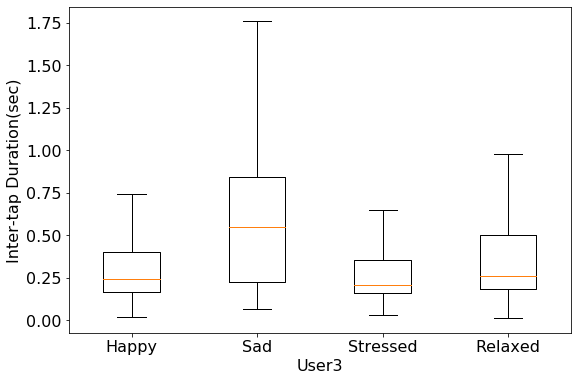

In [3]:
# Retrieving samples for each emotion
def convert_in_range(l):
    
    OldMax=max(l)
    OldMin=min(l)
    NewMax=100
    NewMin=0
    OldRange = (OldMax - OldMin)  
    NewRange = (NewMax - NewMin)  
    
    for i in range(len(l)):
        
        OldValue=l[i]
        l[i] = (((OldValue - OldMin) * NewRange) / OldRange) + NewMin
        #l[i]=round(l[i]*100)
    return l

def Refined_mean(l):
    ITD_collect=[]
    kmeans = KMeans(n_clusters=2, random_state=0).fit(l)
    X=kmeans.labels_
    #print(X)
    one_count = np.count_nonzero(X == 1)
    zero_count=np.count_nonzero(X == 0)
    #print("one_count=",one_count,",zero_count=",zero_count)
    if(one_count>=zero_count):
        index_list= np.where(X == 1)
        count=one_count
    else:
        index_list= np.where(X == 0)
        count=zero_count
    for i in range(count):
        #print(type(index_list[0][i].astype(np.int)))\
        ITD_collect.append(l[np.int16(index_list[0][i]).item()])
    #print(ITD_collect)
    ITD_collect=np.array(ITD_collect)
    return ITD_collect
    
usr_dir="Data_files/"
for user in range(3,4,1):
    usr_file=usr_dir+"U"+str(user)+"_LIHF_itd_file.csv"
    
    
    happy_bucket=[]
    sad_bucket=[]
    stressed_bucket=[]
    relax_bucket=[]
    
    print(usr_file)
    dataset=pd.read_csv(usr_file,header=None)
    dataframe=dataset.values
    
    #print("row_number="+str(dataframe.shape[0]))
    
    # value list holds unique id 
    value_list=[]
    for i in range(dataframe.shape[0]):
        value_list.append(dataframe[i][0])
        
    ID_list=list(set(value_list))
    ID_list.sort()
    print("number of unique ID="+str(len(ID_list)))
    start=0
    next_start=0
    # traverse the whole list and add list of ITD values in emotion list
    for i in range(len(ID_list)):
        ID_number=ID_list[i]
        #print("ID_number="+str(ID_number))
        ITD_values=[]
        
        for j in range(start,dataframe.shape[0],1):
            if(dataframe[j][0]==ID_number):
                ITD_values.append(dataframe[j][2])
                next_start=next_start+1
            else:
                start=next_start
                #print(next_start)
                break
        if(dataframe[j-1][4]==2 and len(ITD_values)>3):
             happy_bucket=happy_bucket+ITD_values
        if(dataframe[j-1][4]==-2 and len(ITD_values)>3):
             sad_bucket=sad_bucket+ITD_values
        if(dataframe[j-1][4]==1 and len(ITD_values)>3):
             stressed_bucket=stressed_bucket+ITD_values
        if(dataframe[j-1][4]==0 and len(ITD_values)>3):
            relax_bucket=relax_bucket+ITD_values
    
    data_to_plot=[]
    data_to_plot2=[]
    emotions=[]
    if(len(happy_bucket)!=0):
        print("happy is present")
        
        #happy_bucket=convert_in_range(happy_bucket)
        print("max=",max(happy_bucket),"min=",min(happy_bucket))
        #res=[]
        #[res.append(x) for x in happy_bucket if x not in res] 
        happy_itd=np.array(happy_bucket)
        #l=np.array(happy_bucket)
        #l=np.reshape(l,(len(l),1))
        #happy_itd=Refined_mean(l)
        #print(happy_bucket)
        
        data_to_plot.append(happy_itd)
        data_to_plot2.append(happy_bucket)
        emotions.append("Happy")
    if(len(sad_bucket)!=0):
        print("sad is present")
       
        #sad_bucket=convert_in_range(sad_bucket)
        print("max=",max(sad_bucket),"min=",min(sad_bucket))
        #res=[]
        #[res.append(x) for x in sad_bucket if x not in res] 
        sad_itd=np.array(sad_bucket)
        #l=np.array(sad_bucket)
        #l=np.reshape(l,(len(l),1))
        #sad_itd=Refined_mean(l)
        #print(sad_bucket)
        data_to_plot.append(sad_itd)
        data_to_plot2.append(sad_bucket)
        emotions.append("Sad")
    if(len(stressed_bucket)!=0):
        print("stressed is present")
        
        #stressed_bucket=convert_in_range(stressed_bucket)
        print("max=",max(stressed_bucket),"min=",min(stressed_bucket))
        #res=[]
        #[res.append(x) for x in happy_bucket if x not in res] 
        stressed_itd=np.array(stressed_bucket)
        #l=np.array(stressed_bucket)
        #l=np.reshape(l,(len(l),1))
        #stressed_itd=Refined_mean(l)
        #print(stressed_bucket)
        data_to_plot.append(stressed_itd)
        data_to_plot2.append(stressed_bucket)
        emotions.append("Stressed")
    if(len(relax_bucket)!=0):
        print("relax is present")
        
        #relax_bucket=convert_in_range(relax_bucket)
        print("max=",max(relax_bucket),"min=",min(relax_bucket))
        #res=[]
        #[res.append(x) for x in happy_bucket if x not in res] 
        relaxed_itd=np.array(relax_bucket)
        #l=np.array(relax_bucket)
        #l=np.reshape(l,(len(l),1))
        #relaxed_itd=Refined_mean(l)
        #print(relax_bucket)
        data_to_plot.append(relaxed_itd)
        data_to_plot2.append(relax_bucket)
        emotions.append("Relaxed")
    #print(data_to_plot)
    # Create a figure instance
    '''
    print(len(data_to_plot2))
    export_data = zip_longest(*data_to_plot2, fillvalue = '')
    with open("Result_Folder/MSI&ITD/All_user_ITD/user"+str(user)+"_ITD.csv", 'w', newline='') as myfile:
        wr = csv.writer(myfile)
        wr.writerow(tuple(emotions))
        wr.writerows(export_data)
    '''
    fig = plt.figure(1, figsize=(9, 6))

    # Create an axes instance
    ax = fig.add_subplot(111)
    #ax.set_ylim(10,100)
    # Create the boxplot
    bp = ax.boxplot(data_to_plot,0,'')
    #ax.boxplot(data_to_plot)
    # Custom x-axis labels
    ax.set_xticklabels(['Happy', 'Sad', 'Stressed', 'Relaxed'])
    ax.set_ylabel('Inter-tap Duration(sec)',fontsize=16)
    ax.set_xlabel('User3',fontsize=16)
    ax.xaxis.set_tick_params(labelsize=16)
    ax.yaxis.set_tick_params(labelsize=16)

    ## Remove top axes and right axes ticks
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
    # Save the figure
    fig.savefig('user3_ITDS.png', bbox_inches='tight')
    
    